In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [6]:
df = pd.read_csv("cars.csv")

In [7]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [8]:
df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [9]:
df.shape

(81, 5)

In [10]:
df.isna().sum()   

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [12]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [13]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [14]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [20]:
x=df.drop("MPG",axis=1)

In [21]:
print(x)

     HP  VOL          SP         WT
0    49   89  104.185353  28.762059
1    55   92  105.461264  30.466833
2    55   92  105.461264  30.193597
3    70   92  113.461264  30.632114
4    53   92  104.461264  29.889149
..  ...  ...         ...        ...
76  322   50  169.598513  16.132947
77  238  115  150.576579  37.923113
78  263   50  151.598513  15.769625
79  295  119  167.944460  39.423099
80  236  107  139.840817  34.948615

[81 rows x 4 columns]


In [22]:
y = df["MPG"]

In [23]:
print(y)

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64


In [19]:
import statsmodels.formula.api as smf

In [27]:
model_stats_1 = smf.ols(formula="MPG~HP+VOL+SP+WT",data=df).fit()

In [28]:
model_stats_1

In [29]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [30]:
model_stats_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [31]:
model_stats_1.aic

np.float64(477.9279049354879)

In [32]:
model_stats_1.bic

np.float64(489.9001507088501)

In [33]:
model_stats_1.rsquared

np.float64(0.7705372737359842)

In [34]:
model_stats_1.rsquared_adj

np.float64(0.7584602881431413)

# AIC - lower - best good fit model

# BIC - lower - best fit model - complexity

# R-Squared -  higher - goog fit model

# Adjusted R-Squared - higher -good fit model

In [44]:
model_1 = smf.ols(formula="MPG~HP+VOL+WT+SP",data=df).fit()

print("AIC = ",model_1.aic)
print("BIC = ",model_1.bic)
print("R2 = ",model_1.rsquared)
print("AdjR2 = ",model_1.rsquared_adj)

AIC =  477.92790493548785
BIC =  489.90015070885005
R2 =  0.7705372737359844
AdjR2 =  0.7584602881431415


In [46]:
model_2 = smf.ols(formula="MPG~HP",data=df).fit()

print("AIC = ",model_2.aic)
print("BIC = ",model_2.bic)
print("R2 = ",model_2.rsquared)
print("AdjR2 = ",model_2.rsquared_adj)

AIC =  530.7452702659343
BIC =  535.5341685752792
R2 =  0.5256806086282022
AdjR2 =  0.5196765656994453


In [47]:
model_3 = smf.ols(formula="MPG~VOL",data=df).fit()

print("AIC = ",model_3.aic)
print("BIC = ",model_3.bic)
print("R2 = ",model_3.rsquared)
print("AdjR2 = ",model_3.rsquared_adj)

AIC =  564.5634161305575
BIC =  569.3523144399023
R2 =  0.27990086511227064
AdjR2 =  0.27078568618964105


In [48]:
model_4 = smf.ols(formula="MPG~WT",data=df).fit()

print("AIC = ",model_4.aic)
print("BIC = ",model_4.bic)
print("R2 = ",model_4.rsquared)
print("AdjR2 = ",model_4.rsquared_adj)

AIC =  564.8358142145094
BIC =  569.6247125238542
R2 =  0.2774751389270127
AdjR2 =  0.2683292546096331


In [49]:
model_5 = smf.ols(formula="MPG~SP",data=df).fit()

print("AIC = ",model_5.aic)
print("BIC = ",model_5.bic)
print("R2 = ",model_5.rsquared)
print("AdjR2 = ",model_5.rsquared_adj)

AIC =  539.408199092848
BIC =  544.1970974021929
R2 =  0.4721402334141218
AdjR2 =  0.46545846421683224


<Axes: >

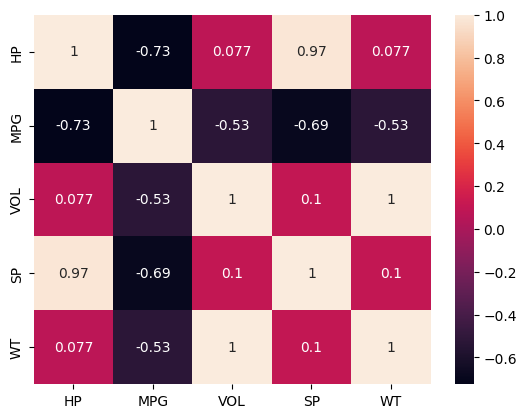

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
model_6 = smf.ols(formula="MPG~HP+SP",data=df).fit()

print("AIC = ",model_6.aic)
print("BIC = ",model_6.bic)
print("R2 = ",model_6.rsquared)
print("AdjR2 = ",model_6.rsquared_adj)

AIC =  531.5481466080848
BIC =  538.7314940721021
R2 =  0.5326391712851648
AdjR2 =  0.5206555602924767


In [53]:
model_7 = smf.ols(formula="MPG~HP+VOL",data=df).fit()

print("AIC = ",model_7.aic)
print("BIC = ",model_7.bic)
print("R2 = ",model_7.rsquared)
print("AdjR2 = ",model_7.rsquared_adj)

AIC =  480.6569237052377
BIC =  487.84027116925506
R2 =  0.7506606277376422
AdjR2 =  0.7442673105001458


In [54]:
model_8 = smf.ols(formula="MPG~HP+SP+WT",data=df).fit()

print("AIC = ",model_8.aic)
print("BIC = ",model_8.bic)
print("R2 = ",model_8.rsquared)
print("AdjR2 = ",model_8.rsquared_adj)

AIC =  476.29927501529767
BIC =  485.87707163398744
R2 =  0.769482813998346
AdjR2 =  0.7605016249333465
